Давайте познакомимся с одним из способов выделения трендовой и сезонной компонент ряда и визуального анализа шума.

In [5]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot

df = pd.read_csv('AirPassengers.csv') # считываем датасет
df.columns = (['Month','Pass']) # заменяем название столбца '#Passenger' на 'Pass' чтобы избежать путаницы с комментариями
df.head() # смотрим на первые несколько строчек

,Month,Pass
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [2]:
# приводим индексы к стандарту pd.Datetime, чтобы потом это можно было скормить seasonal_decompose
df = df.set_index(pd.DatetimeIndex(df['Month'])) 
df.head() # смотрим на результат

,Month,Pass
Month,,
1949-01-01,1949-01,112
1949-02-01,1949-02,118
1949-03-01,1949-03,132
1949-04-01,1949-04,129
1949-05-01,1949-05,121


In [4]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [3]:
 # замечаем, что т.к. у нас теперь есть индекс Month, нам больше не нужен столбец Month, который его дублирует
df.drop(['Month'], axis = 1, inplace = True)
df.head() # снова проверяем, что все в порядке. вообще проверять данные на каждом шаге кода - хорошая привычка

,Pass
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


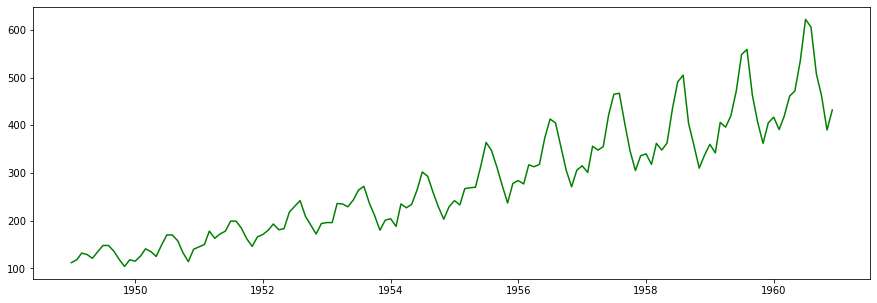

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.plot(df, "g", label="Pass")


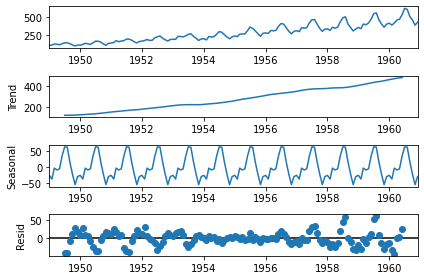

In [4]:
# применяем seasonal_decompose
# эта функция разложит ряд на трендовую, сезонную и шумовую составляющие
decomposition = seasonal_decompose(df, model='additive') 
decomposition.plot()
pyplot.show() # любуемся результатом

In [6]:
trend_part = decomposition.trend # отдельно трендовая составляющаяя
seasonal_part = decomposition.seasonal # отдельно сезонная составляющаяя
residual_part = decomposition.resid # отдельно шум: то, что осталось

In [7]:
# посмотрим повнимательнее на остатки в начале ряда
residual_part.head()

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
Name: resid, dtype: float64

In [8]:
# посмотрим повнимательнее на остатки в конце ряда
residual_part.tail()

Month
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: resid, dtype: float64

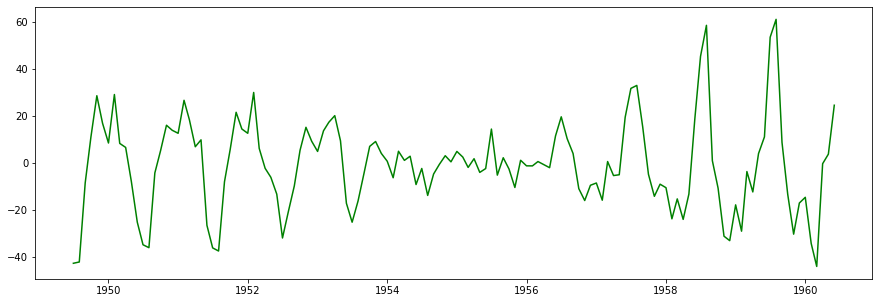

In [9]:
plt.figure(figsize=(15,5))
plt.plot(residual_part, "g", label="Res")


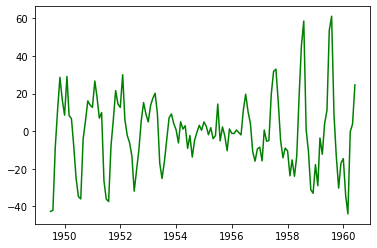

In [10]:
# в конце и в начале стоят значения NaN. Это связано с особенностями алгоритма seasonal_decompose
# если мы хотим далее анализировать остатки, необходимо избавиться от этих некорректных значений
residual_part = residual_part.dropna()
residual_part.head()
plt.plot(residual_part, "g", label="Res")

In [12]:
print(residual_part.shape,trend_part.shape,seasonal_part.shape)

(132,) (144,) (144,)


Анализ результата:

В ряде явно присутствует тренд на рост и ярко выражена годовая сезонность

Остатки ряда не похожи не хаотичный белый шум и скорее всего все еще содержат закономерности

In [20]:
# -*- coding:utf-8 -*-
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pylab as plt
# Чтение данных, pd.read_csv по умолчанию генерирует объект DataFrame, который необходимо преобразовать в объект Series
df = pd.read_csv('AirPassengers.csv', encoding='utf-8')
df.columns = (['date','Pass']) 
df = df.set_index(pd.DatetimeIndex(df['date'])) 
df

,date,Pass
date,,
1949-01-01,1949-01,112
1949-02-01,1949-02,118
1949-03-01,1949-03,132
1949-04-01,1949-04,129
1949-05-01,1949-05,121
...,...,...
1960-08-01,1960-08,606
1960-09-01,1960-09,508
1960-10-01,1960-10,461


In [21]:
# df.index = pd.to_datetime(df.index)  # Преобразовать строковый индекс во временной индекс
ts = df['Pass']  # Создать объект pd.Series
# Просмотр формата данных
ts.head()


date
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: Pass, dtype: int64

In [22]:
ts.head().index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01'],
              dtype='datetime64[ns]', name='date', freq=None)

In [23]:
ts['1949-01-01']
ts[datetime(1949,1,1)]

112

In [24]:
ts['1949']

date
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
Name: Pass, dtype: int64

In [25]:
ts['1949-1' : '1949-6']

date
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
Name: Pass, dtype: int64

In [26]:
# -*- coding:utf-8 -*-
from statsmodels.tsa.stattools import adfuller
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# График скользящего среднего
def draw_trend(timeSeries, size):
    f = plt.figure(facecolor='white')
    # Выполнение скользящего среднего размера данных
    rol_mean = timeSeries.rolling(window=size).mean()
    # Взвешенное скользящее среднее данных размера
    # rol_weighted_mean = pd.ewma(timeSeries, span=size)
    rol_weighted_mean = timeSeries.ewm(span=size).mean()
    # rol_weighted_mean = pd.Series.ewm(df['close']

    timeSeries.plot(color='blue', label='Original')
    rol_mean.plot(color='red', label='Rolling Mean')
    rol_weighted_mean.plot(color='black', label='Weighted Rolling Mean')
    plt.legend(loc='best')
    plt.title('Rolling Mean')
    plt.show()

def draw_ts(timeSeries):
    f = plt.figure(facecolor='white')
    timeSeries.plot(color='blue')
    plt.show()

'''
　　Unit Root Test
   The null hypothesis of the Augmented Dickey-Fuller is that there is a unit
   root, with the alternative that there is no unit root. That is to say the
   bigger the p-value the more reason we assert that there is a unit root
'''
def testStationarity(ts):
    dftest = adfuller(ts)
    # Семантическое описание значения, полученного вышеуказанной функцией
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    return dfoutput

# Графики автокорреляции и частичной корреляции, порядок по умолчанию 31
def draw_acf_pacf(ts, lags=31):
    f = plt.figure(facecolor='white')
    ax1 = f.add_subplot(211)
    plot_acf(ts, lags=31, ax=ax1)
    ax2 = f.add_subplot(212)
    plot_pacf(ts, lags=31, ax=ax2)
    plt.show()

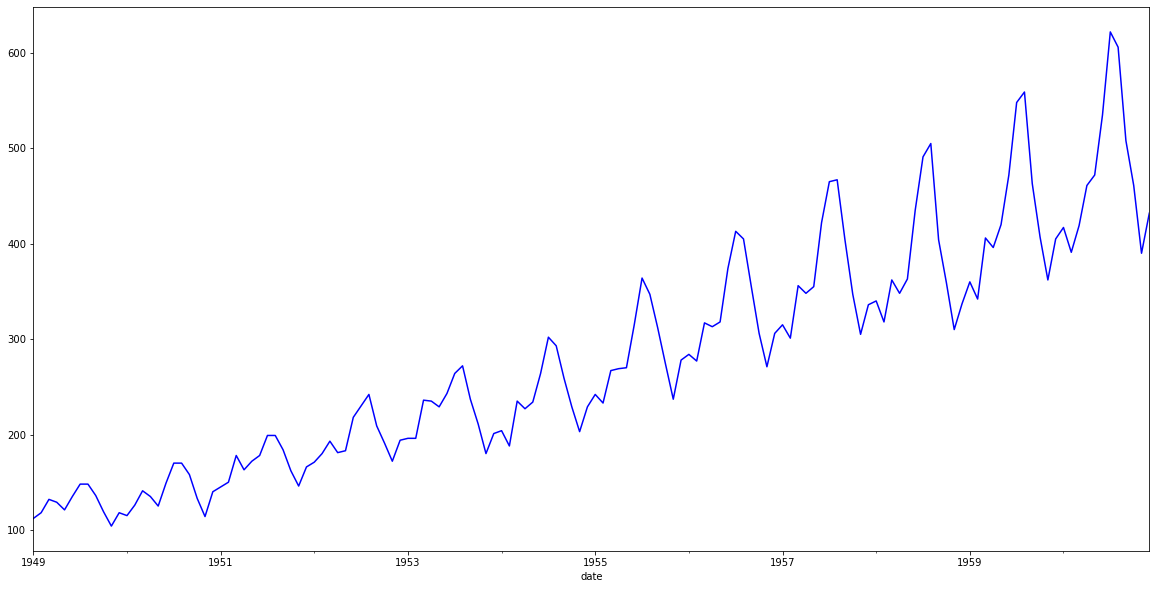

In [27]:
plt.rcParams["figure.figsize"]=(20,10)
draw_ts(ts)

c:\Users\User\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


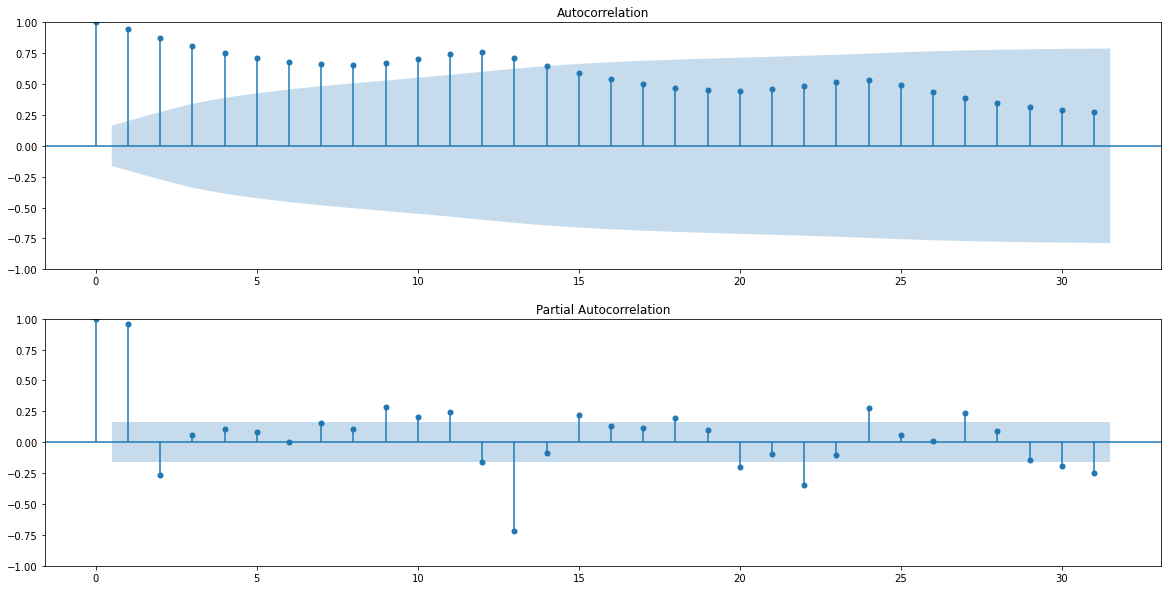

In [28]:
draw_acf_pacf(ts)

In [29]:
testStationarity(ts)

Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64

In [30]:
ts_log = np.log(ts)
testStationarity(ts_log)

Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64

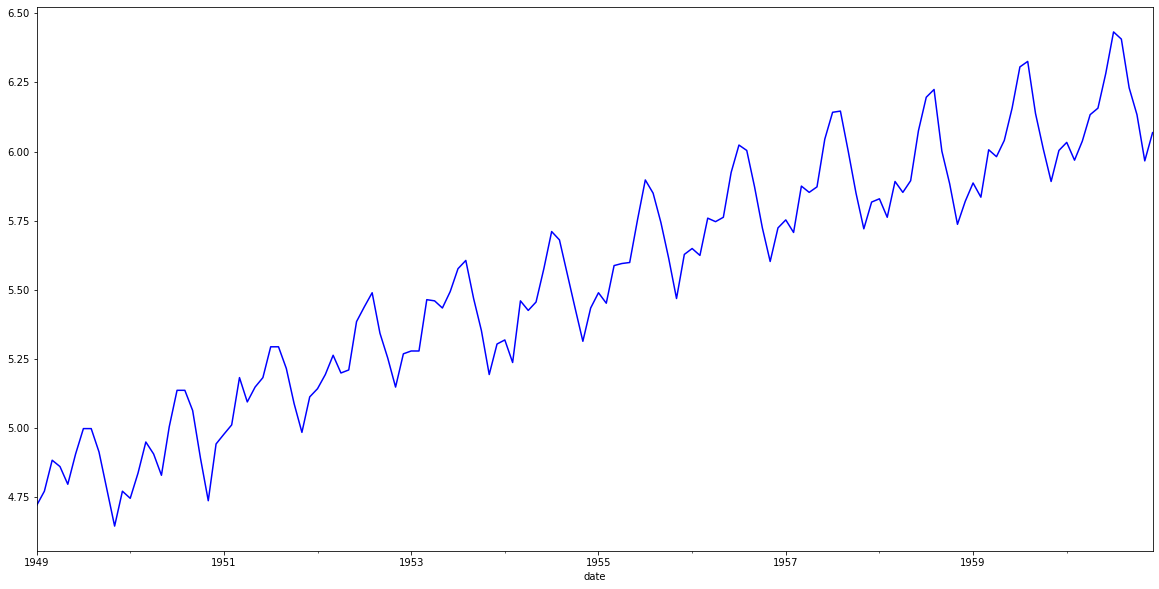

In [31]:
draw_ts(ts_log)

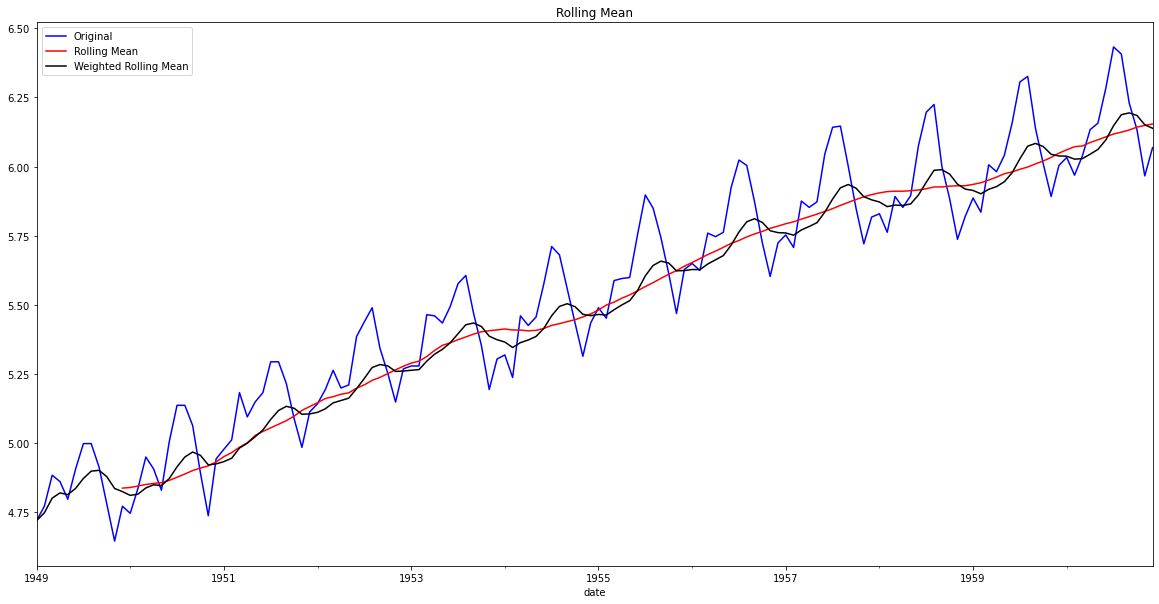

In [32]:
draw_trend(ts_log, 12)

In [33]:
diff_12 = ts_log.diff(12)
diff_12.dropna(inplace=True)
diff_12_1 = diff_12.diff(1)
diff_12_1.dropna(inplace=True)
testStationarity(diff_12_1)

Test Statistic                  -4.443325
p-value                          0.000249
#Lags Used                      12.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64

In [34]:
display(ts_log,diff_12)

date
1949-01-01    4.718499
1949-02-01    4.770685
1949-03-01    4.882802
1949-04-01    4.859812
1949-05-01    4.795791
                ...   
1960-08-01    6.406880
1960-09-01    6.230481
1960-10-01    6.133398
1960-11-01    5.966147
1960-12-01    6.068426
Name: Pass, Length: 144, dtype: float64

date
1950-01-01    0.026433
1950-02-01    0.065597
1950-03-01    0.065958
1950-04-01    0.045462
1950-05-01    0.032523
                ...   
1960-08-01    0.080731
1960-09-01    0.092754
1960-10-01    0.124585
1960-11-01    0.074503
1960-12-01    0.064539
Name: Pass, Length: 132, dtype: float64

In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, model="additive")

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

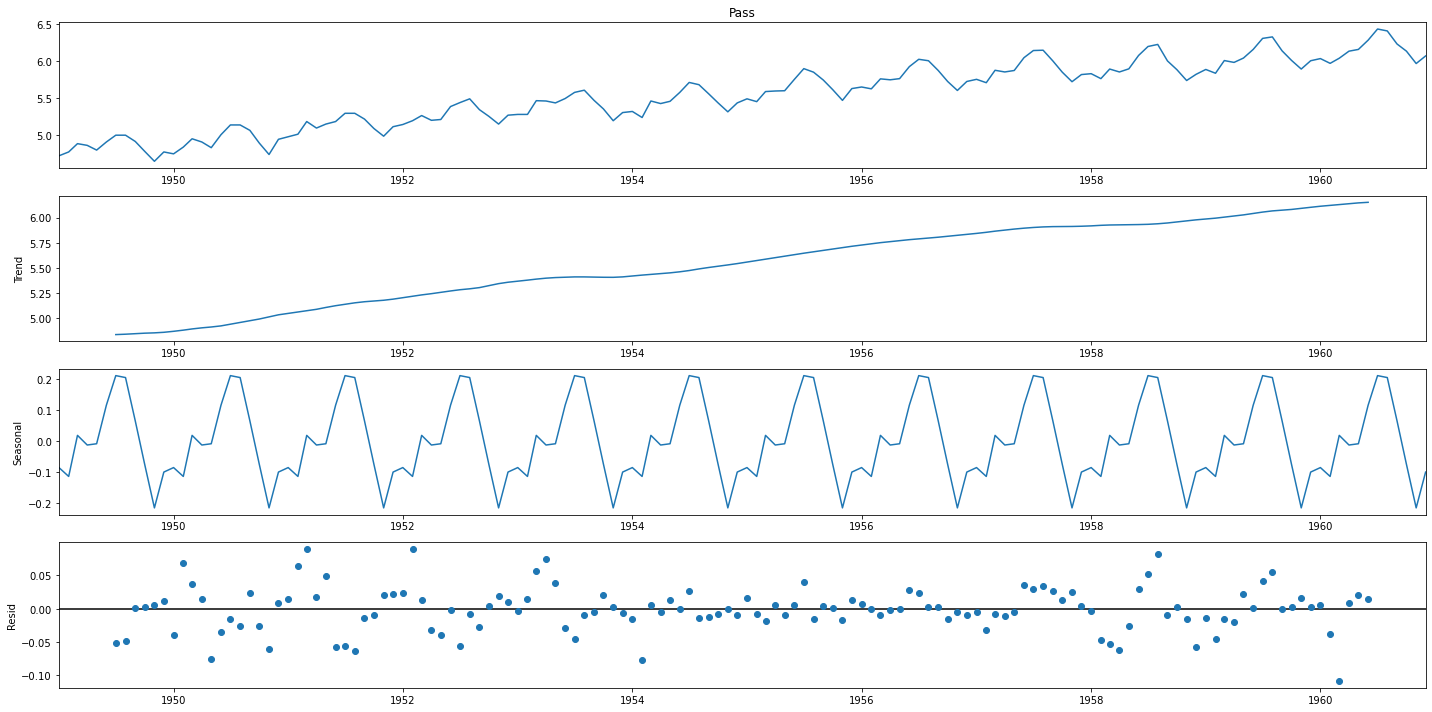

In [38]:
import matplotlib.pyplot as plt
decomposition.plot()
plt.show()

In [39]:
rol_mean = ts_log.rolling(window=12).mean()
rol_mean.dropna(inplace=True)
ts_diff_1 = rol_mean.diff(1)
ts_diff_1.dropna(inplace=True)
testStationarity(ts_diff_1)

Test Statistic                  -2.709577
p-value                          0.072396
#Lags Used                      12.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64

c:\Users\User\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


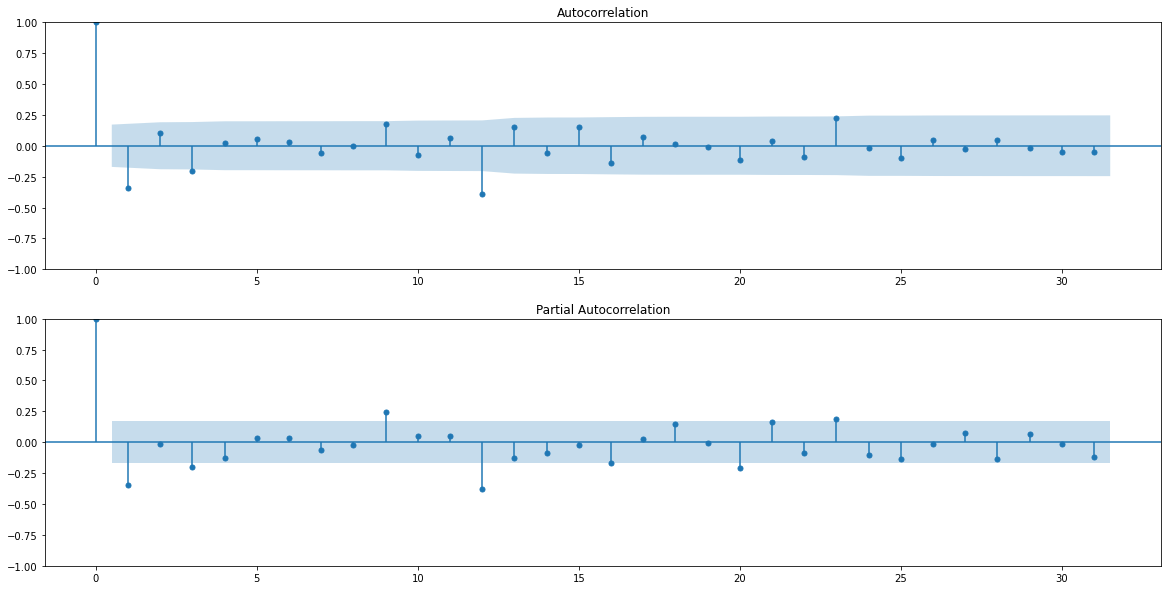

In [40]:
ts_diff_2 = ts_diff_1.diff(1)
ts_diff_2.dropna(inplace=True)
draw_acf_pacf(ts_diff_2)

In [41]:
# from statsmodels.tsa.arima_model import ARMA
# model = ARMA(ts_diff_2, order=(1, 1)) 
# result_arma = model.fit( disp=-1, method='css')
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(ts_diff_2, order=(1,0, 1)) 
result_arma = model.fit()


c:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [42]:
predict_ts = result_arma.predict()
predict_ts


1950-02-01    0.000016
1950-03-01   -0.001099
1950-04-01   -0.000052
1950-05-01    0.000615
1950-06-01    0.000433
                ...   
1960-08-01   -0.000030
1960-09-01    0.001358
1960-10-01   -0.000253
1960-11-01   -0.000922
1960-12-01    0.001429
Freq: MS, Name: predicted_mean, Length: 131, dtype: float64

In [43]:
# Уменьшение разницы первого порядка
diff_shift_ts = ts_diff_1.shift(1)
diff_recover_1 = predict_ts.add(diff_shift_ts)
# Снова восстановление разницы первого порядка
rol_shift_ts = rol_mean.shift(1)
diff_recover = diff_recover_1.add(rol_shift_ts)
# Уменьшение скользящего среднего
rol_sum = ts_log.rolling(window=11).sum()
rol_recover = diff_recover*12 - rol_sum.shift(1)
# Сокращение журнала
log_recover = np.exp(rol_recover)
log_recover.dropna(inplace=True)

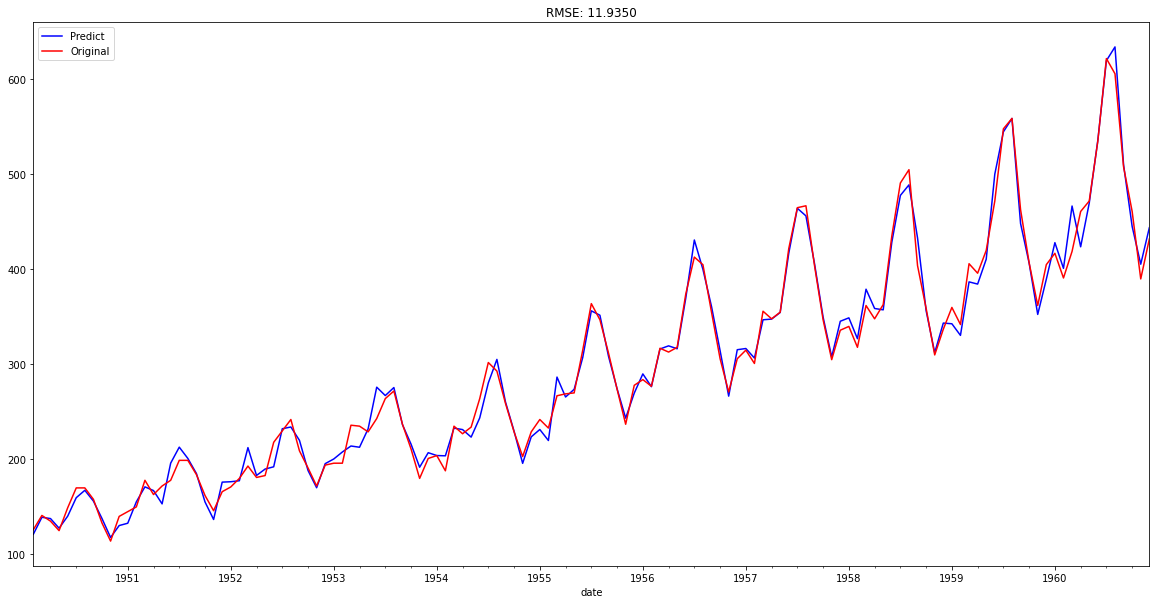

In [44]:
ts = ts[log_recover.index]  # Фильтровать записи без прогноза
plt.figure(facecolor='white')
log_recover.plot(color='blue', label='Predict')
ts.plot(color='red', label='Original')
plt.legend(loc='best')
plt.title('RMSE: %.4f'% np.sqrt(sum((log_recover-ts)**2)/ts.size))
plt.show()

In [45]:
# Дифференциальный режим
def diff_ts(ts, d):
    global shift_ts_list
    # Последовательность разностей, необходимая для динамического прогнозирования значения второго дня
    global last_data_shift_list
    shift_ts_list = []
    last_data_shift_list = []
    tmp_ts = ts
    for i in d:
        last_data_shift_list.append(tmp_ts[-i])
        print(last_data_shift_list)
        shift_ts = tmp_ts.shift(i)
        shift_ts_list.append(shift_ts)
        tmp_ts = tmp_ts - shift_ts
    tmp_ts.dropna(inplace=True)
    return tmp_ts

# Восстановить операцию
def predict_diff_recover(predict_value, d):
    if isinstance(predict_value, float):
        tmp_data = predict_value
        for i in range(len(d)):
            tmp_data = tmp_data + last_data_shift_list[-i-1]
    elif isinstance(predict_value, np.ndarray):
        tmp_data = predict_value[0]
        for i in range(len(d)):
            tmp_data = tmp_data + last_data_shift_list[-i-1]
    else:
        tmp_data = predict_value
        for i in range(len(d)):
            try:
                tmp_data = tmp_data.add(shift_ts_list[-i-1])
            except:
                raise ValueError('What you input is not pd.Series type!')
        tmp_data.dropna(inplace=True)
    return tmp_data

In [46]:
import sys
def proper_model(data_ts, maxLag):
    init_bic = sys.maxsize
    init_p = 0
    init_q = 0
    init_properModel = None
    for p in np.arange(maxLag):
        for q in np.arange(maxLag):
            # model = ARMA(data_ts, order=(p, q))
            print(f'p:{p} q:{q}',end="|")
            model =ARIMA(data_ts, order=(p,0, q)) 
            try:
                results_ARMA = model.fit()
            except:
                continue
            bic = results_ARMA.bic
            print(f'bic:{bic}')
            if bic < init_bic:
                init_p = p
                init_q = q
                init_properModel = results_ARMA
                init_bic = bic
    return init_bic, init_p, init_q, init_properModel

In [47]:
def pltplt(ts,log_recover):

    ts = ts[log_recover.index]  # Фильтровать записи без прогноза
    plt.figure(facecolor='white')
    log_recover.plot(color='blue', label='Predict')
    ts.plot(color='red', label='Original')
    plt.legend(loc='best')
    plt.title('RMSE: %.4f'% np.sqrt(sum((log_recover-ts)**2)/ts.size))
    plt.show()


In [48]:
diffed_ts = diff_ts(ts_log, d=[12, 1])
diffed_ts.index= pd.DatetimeIndex(diffed_ts.index.values,
                               freq=diffed_ts.index.inferred_freq)
diffed_ts.index                               

[6.0330862217988015]
[6.0330862217988015, 0.06453852113757197]


DatetimeIndex(['1950-02-01', '1950-03-01', '1950-04-01', '1950-05-01',
               '1950-06-01', '1950-07-01', '1950-08-01', '1950-09-01',
               '1950-10-01', '1950-11-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', length=131, freq='MS')

In [49]:
display(ts_log,diffed_ts)

date
1949-01-01    4.718499
1949-02-01    4.770685
1949-03-01    4.882802
1949-04-01    4.859812
1949-05-01    4.795791
                ...   
1960-08-01    6.406880
1960-09-01    6.230481
1960-10-01    6.133398
1960-11-01    5.966147
1960-12-01    6.068426
Name: Pass, Length: 144, dtype: float64

1950-02-01    0.039164
1950-03-01    0.000361
1950-04-01   -0.020496
1950-05-01   -0.012939
1950-06-01    0.066148
                ...   
1960-08-01   -0.045934
1960-09-01    0.012024
1960-10-01    0.031830
1960-11-01   -0.050082
1960-12-01   -0.009964
Freq: MS, Name: Pass, Length: 131, dtype: float64

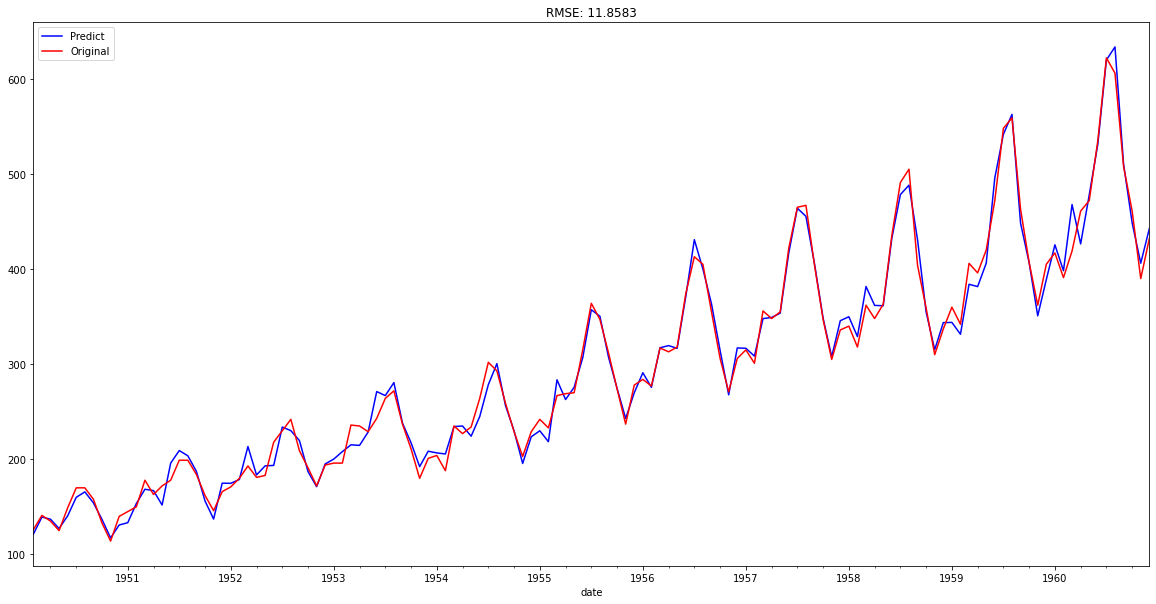

In [39]:
# model = arima_model(diffed_ts)
# model.certain_model(1, 1)
# predict_ts = model.properModel.predict()
model = ARIMA(diffed_ts, order=(1,0, 1)) 
result_arma = model.fit()
predict_ts = result_arma.predict()

diff_recover_ts = predict_diff_recover(predict_ts, d=[12, 1])
log_recover = np.exp(diff_recover_ts)

pltplt(ts,log_recover)

In [ ]:
diffed_ts = diff_ts(ts_log, d=[12, 1])
# model = arima_model(diffed_ts)
# model.certain_model(1, 1)
# predict_ts = model.properModel.predict()

iproperModel=proper_model(diffed_ts, 12)

model = iproperModel[3]


(-439.36518854978067, 0, 1)


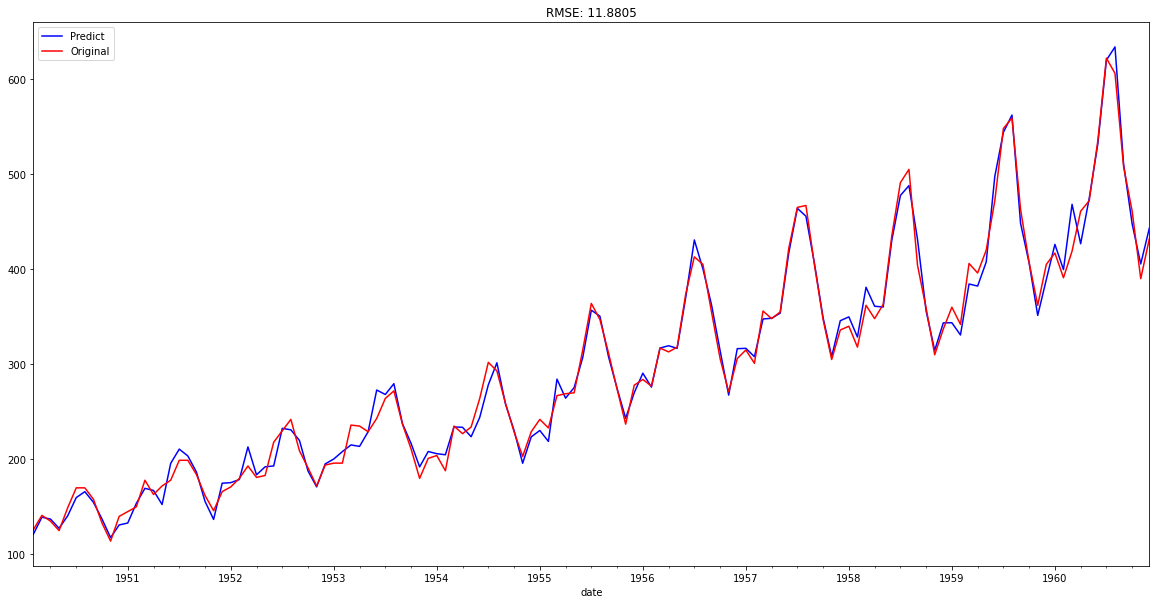

In [40]:
print(iproperModel[:-1])
result_arma =iproperModel[3]
predict_ts = result_arma.predict()

diff_recover_ts = predict_diff_recover(predict_ts, d=[12, 1])
log_recover = np.exp(diff_recover_ts)

pltplt(ts,log_recover)

In [18]:
#для упрощенного примера без исп.класса
from dateutil.relativedelta import relativedelta
def _add_new_data(ts, dat, type='day'):
    if type == 'day':
        new_index = ts.index[-1] + relativedelta(days=1)
    elif type == 'month':
        new_index = ts.index[-1] + relativedelta(months=1)
    ts[new_index] = dat

def add_today_data(model, ts,  data, d, type='day'):
    _add_new_data(ts, data, type)  # Добавить данные в исходную последовательность
    # Добавить новое значение для серии лагов
    d_ts = diff_ts(ts, d)
    model.add_today_data(d_ts[-1], type)

def forecast_next_day_data(model, type='day'):
    if model == None:
        raise ValueError('No model fit before')
    fc = model.forecast_next_day_value(type)
    return predict_diff_recover(fc, [12, 1])

In [16]:
ts_test.shape

(48,)

In [19]:

DIR=''
df = pd.read_csv(f'{DIR}AirPassengers.csv', encoding='utf-8')
df.columns = (['date','x']) 
ts = df.set_index(pd.DatetimeIndex(df['date']))['x'] 

#чтобы арима не ругалась на отсутствие freq в индексе
ts.index= pd.DatetimeIndex(ts.index.values,freq=ts.index.inferred_freq)

# предварительная обработка данных
ts_log = np.log(ts)


ts_train = ts_log[:'1956-12']
ts_test = ts_log['1957-1':]

diffed_ts = diff_ts(ts_train, [12, 1])
forecast_list = []
for i, dta in enumerate(ts_test):
    if i%7 == 0:
        model = arima_model(diffed_ts)
        model.certain_model(1, 1)
    forecast_data = forecast_next_day_data(model, type='month')
    forecast_list.append(forecast_data)
    add_today_data(model, ts_train, dta, [12, 1], type='month')

predict_ts = pd.Series(data=forecast_list, index=ts['1957-1':].index)
log_recover = np.exp(predict_ts)
original_ts = ts['1957-1':]

[5.648974238161206]
[5.648974238161206, 0.0959639882617438]
[5.6240175061873385]
[5.6240175061873385, 0.10359840066442683]
[5.75890177387728]
[5.75890177387728, 0.08309275856153686]
[5.746203190540153]
[5.746203190540153, 0.11602895697475013]
[5.762051382780177]
[5.762051382780177, 0.10599928923432156]
[5.924255797414532]
[5.924255797414532, 0.11006640669523904]
[6.023447592961033]
[6.023447592961033, 0.12074951662147981]
[6.003887067106539]
[6.003887067106539, 0.11858981262632273]
[5.872117789475416]
[5.872117789475416, 0.14244219056235874]
[5.723585101952381]
[5.723585101952381, 0.1292970884857345]
[5.602118820879701]
[5.602118820879701, 0.1257396779944786]
[5.723585101952381]
[5.723585101952381, 0.11819295572771082]
[5.752572638825633]
[5.752572638825633, 0.09352605801082348]
[5.707110264748875]
[5.707110264748875, 0.07637297878457439]
[5.87493073085203]
[5.87493073085203, 0.05494111803130153]
[5.8522024797744745]
[5.8522024797744745, 0.016713480973741035]
[5.872117789475416]
[5.872

bic: -1084.6443562802706 p: 0 q: 1
0.0003920801784858338
[0.0001279]


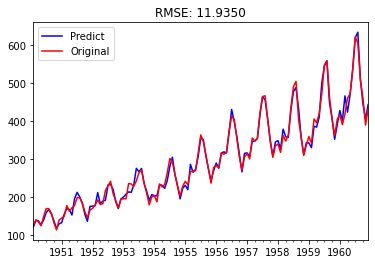

In [17]:
# -*-coding:utf-8-*-
import pandas as pd
import numpy as np
# from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima.model import ARIMA
import sys
from dateutil.relativedelta import relativedelta
from copy import deepcopy
import matplotlib.pyplot as plt
 
class arima_model:
 
    def __init__(self, ts, maxLag=9):
        self.data_ts = ts
        self.resid_ts = None
        self.predict_ts = None
        self.maxLag = maxLag
        self.p = maxLag
        self.q = maxLag
        self.properModel = None
        self.bic = sys.maxsize
 
    # Рассчитайте оптимальную модель ARIMA и назначьте соответствующие результаты соответствующим атрибутам
    def get_proper_model(self,pp=None,qq=None):
        self._proper_model(pp,qq)
        self.predict_ts = deepcopy(self.properModel.predict())
        self.resid_ts = deepcopy(self.properModel.resid)
 
    # Для p, q в заданном диапазоне рассчитайте лучшую модель arima, вот подгонка данных с хорошей разницей, поэтому разница всегда равна 0
    def _proper_model(self,pp,qq):
        for p in [pp] if not(pp is None) else np.arange(self.maxLag):
            for q in [qq] if not(qq is None) else np.arange(self.maxLag):
                # print p,q,self.bic
                # model = ARMA(self.data_ts, order=(p, q))
                model = ARIMA(self.data_ts, order=(1,0, 1)) 
                try:
                    # results_ARMA = model.fit(disp=-1, method='css')
                    results_ARMA = model.fit()
                except:
                    continue
                bic = results_ARMA.bic
                # print 'bic:',bic,'self.bic:',self.bic
                if bic < self.bic:
                    self.p = p
                    self.q = q
                    self.properModel = results_ARMA
                    self.bic = bic
                    self.resid_ts = deepcopy(self.properModel.resid)
                    self.predict_ts = self.properModel.predict()
 
    # модель определения параметров
    def certain_model(self, p, q):
            # model = ARMA(self.data_ts, order=(p, q))
            model = ARIMA(self.data_ts, order=(p,0, q)) 
            try:
                # self.properModel = model.fit( disp=-1, method='css')
                self.properModel = model.fit()
                self.p = p
                self.q = q
                self.bic = self.properModel.bic
                self.predict_ts = self.properModel.predict()
                self.resid_ts = deepcopy(self.properModel.resid)
            except:
                print( 'You can not fit the model with this parameter p,q, ' \
                      'please use the get_proper_model method to get the best model')
 
    # Предсказать значение на второй день
    def forecast_next_day_value(self, type='day'):
        # Я изменил исходный код arima_model в пакете statsmodels и добавил постоянный атрибут, 
        # мне нужно сначала запустить метод прогноза и присвоить значение константе
        self.properModel.forecast()
        if self.data_ts.index[-1] != self.resid_ts.index[-1]:
            raise ValueError('''The index is different in data_ts and resid_ts, please add new data to data_ts.
            If you just want to forecast the next day data without add the real next day data to data_ts,
            please run the predict method which arima_model included itself''')
        if not self.properModel:
            raise ValueError('The arima model have not computed, please run the proper_model method before')
        para = self.properModel.params
 
        # print self.properModel.params
        if self.p == 0:   # It will get all the value series with setting self.data_ts[-self.p:] when p is zero
            ma_value = self.resid_ts[-self.q:]
            values = ma_value.reindex(index=ma_value.index[::-1])
        elif self.q == 0:
            ar_value = self.data_ts[-self.p:]
            values = ar_value.reindex(index=ar_value.index[::-1])
        else:
            ar_value = self.data_ts[-self.p:]
            ar_value = ar_value.reindex(index=ar_value.index[::-1])
            ma_value = self.resid_ts[-self.q:]
            ma_value = ma_value.reindex(index=ma_value.index[::-1])
            values = ar_value.append(ma_value)
 
        # predict_value = np.dot(para[1:], values) #+ self.properModel.constant[0]
        #в модели арима больше параметров. замена для ma.L1: он под индексом 2 теперь.
        predict_value = np.dot(para[2], values) #+ self.properModel.constant[0]
        self._add_new_data(self.predict_ts, predict_value, type)
        return predict_value
 
    # Динамически добавлять функции данных, которые обрабатываются отдельно для индекса месяца и дня.
    def _add_new_data(self, ts, dat, type='day'):
        if type == 'day':
            new_index = ts.index[-1] + relativedelta(days=1)
        elif type == 'month':
            new_index = ts.index[-1] + relativedelta(months=1)
        ts[new_index] = dat
 
    def add_today_data(self, dat, type='day'):
        self._add_new_data(self.data_ts, dat, type)
        if self.data_ts.index[-1] != self.predict_ts.index[-1]:
            raise ValueError('You must use the forecast_next_day_value method forecast the value of today before')
        self._add_new_data(self.resid_ts, self.data_ts[-1] - self.predict_ts[-1], type)
 

if __name__ == '__main__':
    # df = pd.read_csv('AirPassengers.csv', encoding='utf-8', index_col='date')
    # df.index = pd.to_datetime(df.index)
    # ts = df['x']
    # DIR="C:\\Users\\vsevolod.volkov\\SkillFactory\\GitHub\\module_15\\"
    # DIR=r'C:\Users\User\SkillFactory\GitHub\module_15\\'
    DIR=''
    df = pd.read_csv(f'{DIR}AirPassengers.csv', encoding='utf-8')
    df.columns = (['date','x']) 
    ts = df.set_index(pd.DatetimeIndex(df['date']))['x'] 
 
    #чтобы арима не ругалась на отсутствие freq в индексе
    ts.index= pd.DatetimeIndex(ts.index.values,freq=ts.index.inferred_freq)

    # предварительная обработка данных
    ts_log = np.log(ts)
    rol_mean = ts_log.rolling(window=12).mean()
    rol_mean.dropna(inplace=True)
    ts_diff_1 = rol_mean.diff(1)
    ts_diff_1.dropna(inplace=True)
    ts_diff_2 = ts_diff_1.diff(1)
    ts_diff_2.dropna(inplace=True)
 
    # модель подходит
    model = arima_model(ts_diff_2)
    #  Здесь используйте параметры модели для автоматической идентификации
    model.get_proper_model(0,1)
    print( 'bic:', model.bic, 'p:', model.p, 'q:', model.q)
    print( model.properModel.forecast()[0])
    print( model.forecast_next_day_value(type='month'))
 
    # Восстановление результата прогноза
    predict_ts = model.properModel.predict()
    diff_shift_ts = ts_diff_1.shift(1)
    diff_recover_1 = predict_ts.add(diff_shift_ts)
    rol_shift_ts = rol_mean.shift(1)
    diff_recover = diff_recover_1.add(rol_shift_ts)
    rol_sum = ts_log.rolling(window=11).sum()
    rol_recover = diff_recover*12 - rol_sum.shift(1)
    log_recover = np.exp(rol_recover)
    log_recover.dropna(inplace=True)
 
    # Картирование результатов прогнозирования
    ts = ts[log_recover.index]
    plt.figure(facecolor='white')
    log_recover.plot(color='blue', label='Predict')
    ts.plot(color='red', label='Original')
    plt.legend(loc='best')
    plt.title('RMSE: %.4f'% np.sqrt(sum((log_recover-ts)**2)/ts.size))
    plt.show()


In [48]:
from urllib.parse import unquote

print(unquote("Lech_Kaczy%C5%84ski"))

Lech_Kaczyński
